Nathan Saric - 04/08/2021

## Clustering
In this part of the assignment we look at [Hierarchical Cluster Analysis (HCA)](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy) clustering using scipy.

For reference, [sklearn](http://scikit-learn.org/stable/modules/clustering.html) can be used for many of the other clustering approaches discussed in class.

In chapter 6 of Data Science for Business, the author performs cluster analysis on a [whiskey dataset](http://adn.biol.umontreal.ca/~numericalecology/data/scotch.html).

First, lets import this dataset, drop a few features, and take a look.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
whiskey = pd.read_csv("scotch.csv")

whiskey = whiskey.drop([u'age', u'dist', u'score', u'percent', u'region', u'district', u'islay', u'midland', u'spey', u'east', u'west', u'north ', u'lowland', u'campbell', u'islands'], axis=1)

In [3]:
whiskey.head()

,color.wyne,color.yellow,color.v.pale,color.pale,color.p.gold,color.gold,color.o.gold,color.f.gold,color.bronze,color.p.amber,...,fin.smoke,fin.sweet,fin.spice,fin.oil,fin.salt,fin.arome,fin.ling,fin.long,fin.very,fin.quick
Aberfeldy,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Aberlour,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Ardberg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Ardmore,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Auchentoshan,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [4]:
whiskey.columns.values

array(['color.wyne', 'color.yellow', 'color.v.pale', 'color.pale',
       'color.p.gold', 'color.gold', 'color.o.gold', 'color.f.gold',
       'color.bronze', 'color.p.amber', 'color.amber', 'color.f.amber',
       'color.red', 'color.sherry', 'nose.aroma', 'nose.peat',
       'nose.sweet', 'nose.light', 'nose.fresh', 'nose.dry', 'nose.fruit',
       'nose.grass', 'nose.sea', 'nose.sherry', 'nose.spicy', 'nose.rich',
       'body.soft', 'body.med', 'body.full', 'body.round', 'body.smooth',
       'body.light', 'body.firm', 'body.oily', 'pal.full', 'pal.dry',
       'pal.sherry', 'pal.big', 'pal.light', 'pal.smooth', 'pal.clean',
       'pal.fruit', 'pal.grass', 'pal.smoke', 'pal.sweet', 'pal.spice',
       'pal.oil', 'pal.salt', 'pal.arome', 'fin.full', 'fin.dry',
       'fin.warm', 'fin.big', 'fin.light', 'fin.smooth', 'fin.clean',
       'fin.fruit', 'fin.grass', 'fin.smoke', 'fin.sweet', 'fin.spice',
       'fin.oil', 'fin.salt', 'fin.arome', 'fin.ling', 'fin.long',
       'fin.very

We see that our dataset is composed of categorical features describing the Colour, Nose, Body, Palate, and Finish of each whiskey. Each row of data is refered to as the feature vector which describes the whiskey. In this case, each whiskey has a feature vector of 68 attributes.

Suppose you are interested in finding whiskeys that are similar to Highland Park.

---
** Question 1 **  
The code below calculates the euclidean distance between Highland Park and other whiskeys and returns the closest 10 whiskeys. Perform the same analysis using at least [one other distance function](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html).

In [5]:
from scipy.spatial import distance
from scipy.spatial.distance import pdist, squareform

distances = pd.DataFrame()
highland_loc = np.where(whiskey.index == 'Highland Park')[0][0]

euclidean_distances = distance.squareform(distance.pdist(whiskey, 'euclidean'))
euclidean_closest = np.argsort(euclidean_distances[:, highland_loc])
distances['euc_name'] = whiskey.index[euclidean_closest]
distances['euc_score'] = euclidean_distances[euclidean_closest, highland_loc]

distances.head(10)

,euc_name,euc_score
0,Highland Park,0.000000
1,North Port,3.162278
2,Glendronach,3.162278
3,Balmenach,3.162278
4,Balvenie,3.162278
5,Lochside,3.162278
6,Glen Albyn,3.316625
7,Saint Magdalene,3.316625
8,Glendullan,3.316625
9,Glenfarclas,3.316625


In [6]:
# Calculates the jaccard distance between Highland Park and other whiskeys and returns the closest 10 whiskeys
jc_distances = pd.DataFrame()
jc_highland_loc = np.where(whiskey.index == 'Highland Park')[0][0]

jaccard_distances = distance.squareform(distance.pdist(whiskey, 'jaccard'))
jaccard_closest = np.argsort(jaccard_distances[:, highland_loc])
jc_distances['jac_name'] = whiskey.index[jaccard_closest]
jc_distances['jac_score'] = jaccard_distances[jaccard_closest, jc_highland_loc]

jc_distances.head(10)

,jac_name,jac_score
0,Highland Park,0.000000
1,Glendullan,0.578947
2,Glendronach,0.588235
3,Balmenach,0.588235
4,Oban,0.600000
5,Lochside,0.625000
6,North Port,0.625000
7,Glen Albyn,0.647059
8,Saint Magdalene,0.647059
9,Linkwood,0.666667


Suppose you now want to categorize the whiskeys based on how similar they are to each other. You can use scipy's hierarchical/agglomerative clustering to build a dendrogram.

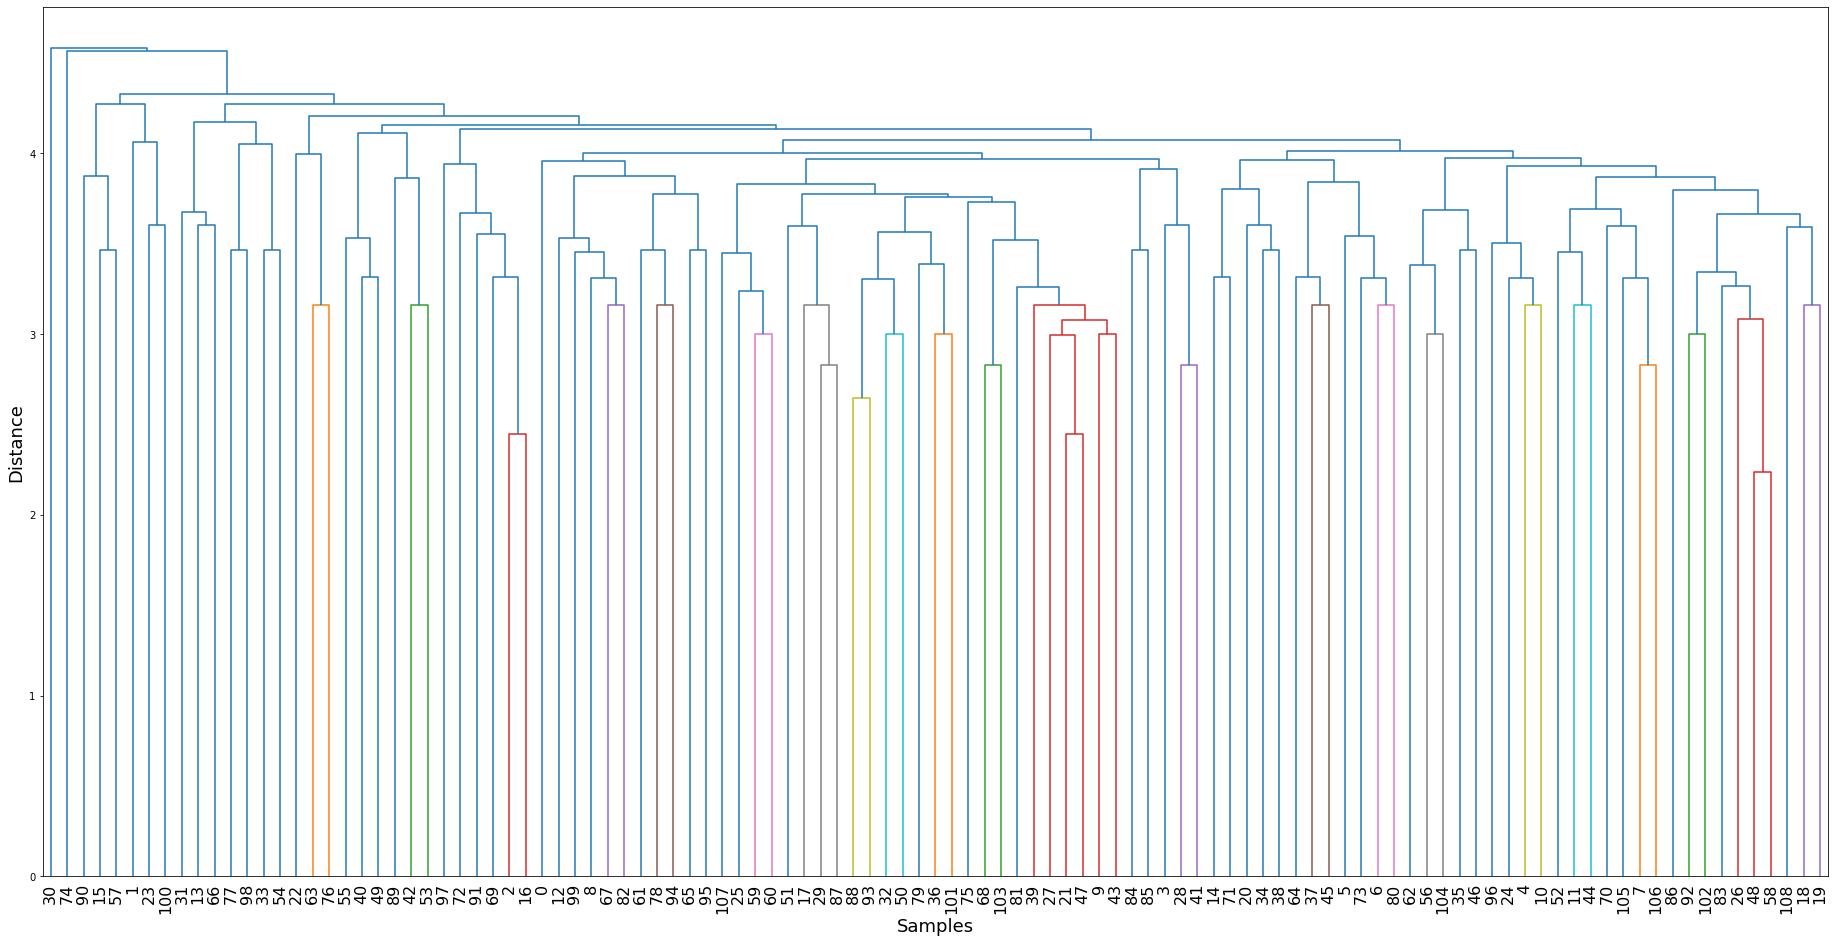

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram

# This function gets pairwise distances between observations in n-dimensional space.
dists = pdist(whiskey, metric="euclidean")

# This scipy's function performs hierarchical/agglomerative clustering on the condensed distance matrix y.
links = linkage(dists, method='average')

# Now we want to plot those 'links' using "dendrogram" function
plt.rcParams['figure.figsize'] = 32, 16

den = dendrogram(links)

plt.xlabel('Samples',fontsize=18)
plt.ylabel('Distance',fontsize=18)
plt.xticks(rotation=90,fontsize=16)
plt.show()

** Question 2 **  
Discuss some insights you can decipher from this dendrogram.

---

By drawing a horizontal line through the dendogram when the distance is roughly halfway between 2 and 3, we notice there are 3 pairs of observations joined together below the line. This suggests that these pairs are similar clusters. For example, observation 48 and 58 have the shortest distance and therefore are most similar. Similarly, observations 2 and 16, along with observations 21 and 47, follow a similar logic. On the other hand, when the distance is roughly between 4 and 5, the dendrogram illustrates that observations 30 and 74 should be clustered separately from the rest of the samples. 

---
## Ensemble Learning

In this part of the assignment, we look at [Ensemble Methods with sklearn](http://scikit-learn.org/stable/modules/ensemble.html). Specifically, we use [Forests of randomized trees](http://scikit-learn.org/stable/modules/ensemble.html#forest), [Gradient Tree Boosting](http://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting)

### Classifiction using Forest of Randomized Trees

The code below trains a `RandomForestClassifier` on the iris dataset.

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris["data"], iris["target"], test_size=0.33, random_state=15)

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(X_train,y_train)
rnd_pred = rnd_clf.predict(X_test)

print(rnd_clf.__class__.__name__, accuracy_score(y_test, rnd_pred))

RandomForestClassifier 0.96


If you look at a single Decision Tree, important features are likely to appear closer to the root of the tree, while unimportant features will often appear closer to the leaves (or not at all). It is therefore possible to get an estimate of a feature’s importance by computing the average depth at which it appears across all trees in the forest. This can give a quick idea of what features actually matter if you need to perform feature selection

In [9]:
for name,score in zip(iris["feature_names"],rnd_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.08096785188870217
sepal width (cm) 0.027320201563630218
petal length (cm) 0.4509465142158711
petal width (cm) 0.44076543233179655


** Question 3 **  
Use the cell below to train a classifier of your choice using only petal length and petal width and compare the accuracy to the one of the Random Forest. (Hint: length and width are the last two columns of the data array.) 

In [10]:
# Trains a BaggingClassifier using only the petal length and petal width from the iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

iris_petal = load_iris()
iris_petal.data = iris_petal.data[:,2:]

X_train, X_test, y_train, y_test = train_test_split(iris_petal["data"], iris_petal["target"], test_size=0.33, random_state=15)

bg_clf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

bg_clf.fit(X_train,y_train)
bg_pred = bg_clf.predict(X_test)

print(bg_clf.__class__.__name__, accuracy_score(y_test, bg_pred))

BaggingClassifier 0.98


When comparing the accuracy of the BaggingClassifier to the RandomForestClassifier, the RandomForestClassifier has an accuracy of 96% whereas the BaggingClassifier produces an accuracy ranging between 94% and 100% when running it mutiple times. Therefore, on average, the BaggingClassifier is more accurate than the RandomForestClassifier.

### Regression using Gradient Tree Boosting

The code below uses `GradientBoostingRegressor` on sample data.

In [11]:
# Data Sampling
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 10*X[:, 0]**3 + .08 * np.random.randn(100)

In [12]:
# Training
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

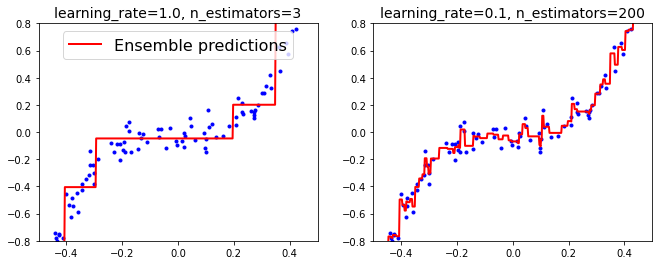

In [13]:
# Plotting
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)
    
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.8, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.8, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)

plt.show()

As you can see, the model on the left underfits the data and the model on the right overfits the data.

** Question 4 **  
Which model parameters can you adjust to optimize the fit?

---

When using the GradientBoostingRegressor function, the two most important parameters are n_estimators and learning_rate. 

n_estimators specifies the number of weak learners (regression trees) to use. The first plot illustrates when n_estimators is 3 whereas the second plot shows when this parameter is 200. 

learning_rate is a hyper-paramter that takes on a value between 0 and 1 used to control overfitting from shrinkage and aims to control the training error. The first plot illustrates when learning_rate is 1.0 whereas the second plot shows when this parameter is 0.1. 

In order to optimize the fit, we can adjust n_estimators and learning_rate. Ideally, you would tune the hyper-parameters to determine the optimal number of iterations by early stopping. However, supplying n_estimators somewhere in the range 90-110, and a learning_rate of approximately 0.05 should produce a plot with minimal underfitting and overfitting errors. 

This plot is shown below:

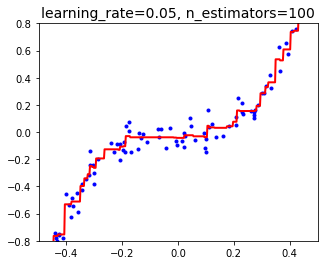

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

# Training an adjusted model
gbrt_optimal = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=0.05, random_state=42)
gbrt_optimal.fit(X, y)

# Plotting the adjusted model
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)
    
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt_optimal], X, y, axes=[-0.5, 0.5, -0.8, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_optimal.learning_rate, gbrt_optimal.n_estimators), fontsize=14)

plt.show()

---

### Classification using Stacked Generalization

In this section, we combine the various ensemble methods learned to create a model stack for classification task.

The task is to perform optical character recognition by classifying handwritten numbers from 0 to 9. Here is a sample of our training data from the dataset called MNIST:

![numbers](numbers.png)

To download MNIST data (train.csv), use this link from Kaggle https://www.kaggle.com/c/digit-recognizer/data?select=train.csv

The following code loads the MNIST data, and splits it into a training set, a validation set, and a test set.

In [15]:
minst_data = pd.read_csv("train.csv")
y=minst_data['label']
X=minst_data.drop(['label'], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

** Question 5 **  

*Step 1: Build individual ensemble classifiers.*

Train a [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and a [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) using `X_train` and `y_train`.

Use each of the model to predict the values of `X_test` and calculate the accuracy of against `y_test`.

*Step 2: Combine classifiers through model stacking.*

Use the classifiers from step 1 to predict againsts their own training data. Combine the two resulting sets of prediction into a new set called `X_train_pred` and train a new `RandomForestClassifier` using the new `X_train_pred`, and previous`y_train` to create a blender.

Use this blender to predict `X_test` and compare the accuracy against `y_test` to the accuracy acheived with the individual classifiers in step 1.

Hint 1: For xgboost, you can look at my code example in zoom session file, but you need to find the right objective and evaluation metric, look up xgboost documentation. You also need to be able to predict target values instead of probabilities here.

Hint 2: To combine prediction results, which are numpy arrays, use zip() function then turn them into a list and then pandas dataframe

In [16]:
# Training a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)

print(rf_clf.__class__.__name__, accuracy_score(y_test, rf_pred))

RandomForestClassifier 0.9641414141414142


In [17]:
# Training a GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=5, learning_rate=1.0, random_state=42)
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)

print(gb_clf.__class__.__name__, accuracy_score(y_test, gb_pred))

GradientBoostingClassifier 0.7966089466089467


In [18]:
# Using classifiers to predict against their own training data
rf_train_selfpred = rf_clf.predict(X_train)
gb_train_selfpred = gb_clf.predict(X_train)

# Combining the two resulting sets into a new training set
X_train_pred = pd.DataFrame(list(zip(rf_train_selfpred, gb_train_selfpred)))

# Using classifiers to predict against their own testing data
rf_test_selfpred = rf_clf.predict(X_test)
gb_test_selfpred = gb_clf.predict(X_test)

# Combining the two resulting sets into a new testing set
X_test_pred = pd.DataFrame(list(zip(rf_test_selfpred, gb_test_selfpred)))

# Training a new RandomForestClassifier
rf_clfblend = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf_clfblend.fit(X_train_pred, y_train)
rf_blend_pred = rf_clfblend.predict(X_test_pred)

print(rf_clfblend.__class__.__name__, accuracy_score(y_test, rf_blend_pred))

RandomForestClassifier 0.9641414141414142


In step 1, the RandomForestClassifier had an accuracy of about 0.9641 or 96.41% whereas the GradientBoostingClassifier had an accuracy of about 0.7966 or 79.66%. After stacking these models to create a blended model in step 2, the resulting accuracy of the new RandomForestClassifier ranged from 96.41% to 100% when running it multiple times. Therefore, on average, the new RandomForestClassifier from step 2 is more accurate than its two component models from step 1. 